In [3]:
# Importação das bibliotecas necessárias:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import cm

# Uso da função mágica plotar os gráficos:
%matplotlib inline

In [4]:
# Definindo o número de amostras:
M = 1000

# Definindo os pesos:
a0 = 1.4
a1 = 3.0

# Definindo a função de features:
x0 = np.ones((M, 1))
x  = (np.random.uniform(0.0, 10.0, M)).reshape(M, 1)

# Definindo o função de target:
y  = a0 * x**a1

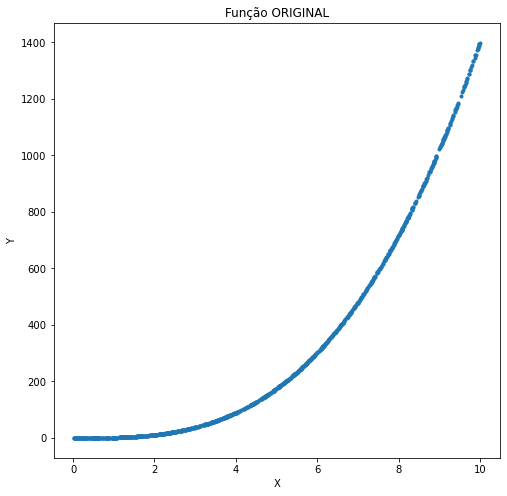

In [5]:
# Plotando a função original
fig = plt.figure(figsize=(8,8))
plt.plot(x,y,'.')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Função ORIGINAL')
plt.show()

In [9]:
# Linearizando a função não linear

x = np.log(x)
y = np.log(y)

[]

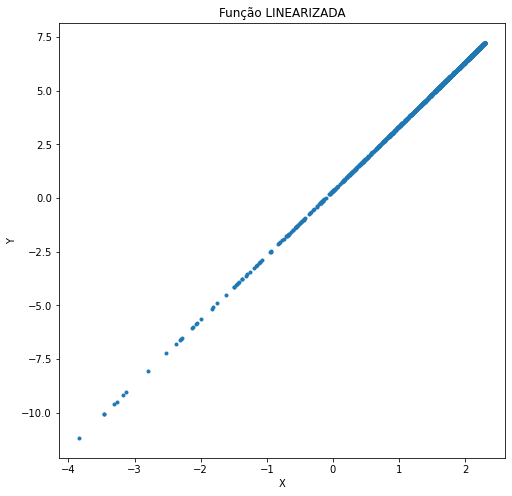

In [10]:
# Plotando a função não linear

fig = plt.figure(figsize=(8, 8))
plt.plot(x, y, '.')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Função LINEARIZADA')
plt.plot()

In [92]:
# Plotando a SUPERFÍCIE DE ERRO

# Definindo o número de ITERAÇÕES
N = 400

# Defininfo valores linearmente espações para os ATRIBUTOS
a0 = np.linspace(-20.0, 20.0, N)
a1 = np.linspace(-20.0, 20.0, N)

# Criando uma MALHA com os atributos:
A0, A1 = np.meshgrid(a0, a1)

# Criando um vetor para armazenar os valores do ERRO
J = np.zeros((N, N))

# LOOP
for iter1 in range(0, N):
    for iter2 in range(0, N):
        y_hat = A0[iter1][iter2] + A1[iter1][iter2] * x
        J[iter1][iter2] = (1.0/M)*np.sum(np.square(y - y_hat))

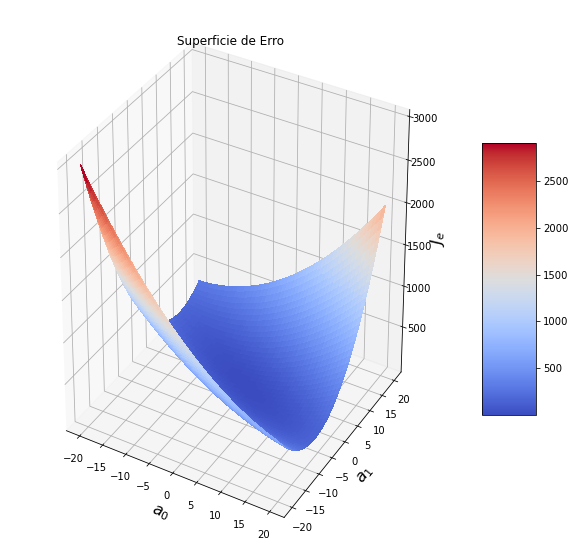

In [93]:
# Plota o gráfico da SUPERFÍCIE DE ERRO:

fig = plt.figure(figsize=(10, 10))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(A0, A1, J, cmap=cm.coolwarm, linewidth=0, 
                       antialiased=False)

fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_xlabel('$a_0$', fontsize=16)
ax.set_ylabel('$a_1$', fontsize=16)
ax.set_zlabel('$J_e$', fontsize=16);
plt.title('Superficie de Erro')
plt.show()

In [94]:
# Encontrando os valores ÓTIMOS pela equação NORMAL:

# Concatenando os valores de ENTRADA:
X = np.c_[x0, x]

a_opt = np.linalg.pinv(np.transpose(X).dot(X)).dot(np.transpose(X).dot(y))
y_hat = X.dot(a_opt) 
j_opt = (1.0/M)*np.sum(np.power((y - y_hat), 2))

In [95]:
print('O valor de a0 ótimo encontrado pela formula fechada é: {}'.format(a_opt[0, 0]))
print('O valor de a2 ótimo encontrado pela formula fechada é: {}'.format(a_opt[1, 0]))

O valor de a0 ótimo encontrado pela formula fechada é: 0.33647223662120673
O valor de a2 ótimo encontrado pela formula fechada é: 3.0000000000000036


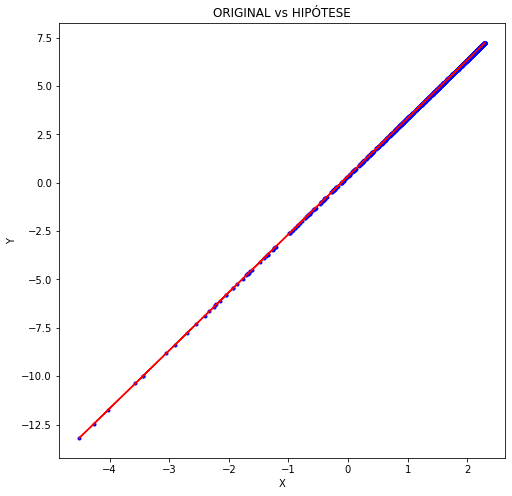

In [96]:
# Plotando a comparação entre a função HIPÔTESE e a Função ORIGINAL

fig = plt.figure(figsize=(8, 8))
plt.plot(x,y,'b.')
plt.plot(x, y_hat, 'r')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('ORIGINAL vs HIPÓTESE')
plt.show()

In [109]:
# Aplicação do GRADIENTE DESCENDENTE:

# Definindo o passo de aprendizagem:
alpha = 0.09

# Criando o vetor de pesos finais para ARMAZENAMENTO:
a = np.zeros((2, 1))

# Definindo o valor INICIAL dos PESOS:
a[0, 0] = -10
a[1, 0] = -10

# Criando a matriz HISTÓRICA dos pesos:.
a_hist = np.zeros((3, M+1))

# Criando a matriz de ERRO:
jgd = np.zeros(M+1)

# Definindo o valor inicial do ERRO:
jgd[0] = (1.0/M)*sum(np.power(y - X.dot(a), 2))

In [110]:
# Definindo a iteração INICIAL:
iteration = 0

# Criando a matriz de HISTÓRICO dos GRADIENTES:
grad_hist = np.zeros((3, M))

# Definindo o ERROR para CRITÉRIO DE PARADA:
error = 1

In [111]:
# LOOP do GRADIENTE DESCENDETENTE BATELADA:
while iteration < M and error > 0.00001:
    
    # Definindo a equação do Gradiente
    gradients = -(2.0/M) * X.T.dot(y - y_hat)
    
    grad_hist[0, iteration] = gradients[0, 0]
    grad_hist[1, iteration] = gradients[1, 0]
    
    # Atualizando o PESO
    a = a - alpha * gradients
    
    # Armazenando o Histórico
    a_hist[0, iteration + 1] = a[0, 0]
    a_hist[1, iteration + 1] = a[1, 0]
    
    # Executando a função HIPÓTESE:
    y_hat = X.dot(a)
    
    # Encontrando o ERRO
    jgd[iteration + 1] = (1.0/M) * sum(np.power((y - y_hat), 2))
       
    # Atualizando o valor do ERROR:
    error = np.abs(jgd[iteration+1] - jgd[iteration])
        
    # Incrementando a ITERAÇÃO    
    iteration = iteration + 1

In [112]:
# Imprimindo os valores dos PESOS encontrados pelo GRADIENTE:
print('O valor de a0 ótimo encontrado pelo GRADIENTE: {}'.format(a[0, 0]))
print('O valor de a1 ótimo encontrado pelo GRADIENTE: {}'.format(a[1, 0]))

O valor de a0 ótimo encontrado pelo GRADIENTE: 0.32331730467256653
O valor de a1 ótimo encontrado pelo GRADIENTE: 3.007057250504627


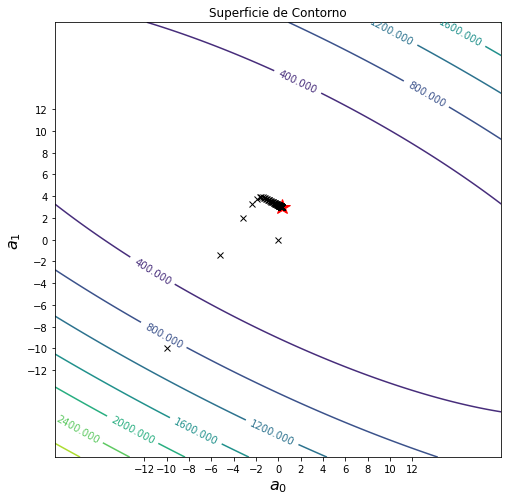

In [113]:
# Plotando a superfície de contorno dos PESOS vs ERRO

fig = plt.figure(figsize=(8, 8))
cp = plt.contour(A0, A1, J)
plt.clabel(cp, inline=1, fontsize=10)
plt.xlabel('$a_0$', fontsize=16)
plt.ylabel('$a_1$', fontsize=16)
plt.title('Superficie de Contorno')
plt.plot(a_opt[0], a_opt[1], c='r', marker='*', markersize=16)
plt.plot(a_hist[0, 0:iteration], a_hist[1, 0:iteration], 'kx')
plt.xticks(np.arange(-12, 14, step=2.0))
plt.yticks(np.arange(-12, 14, step=2.0))
plt.show()

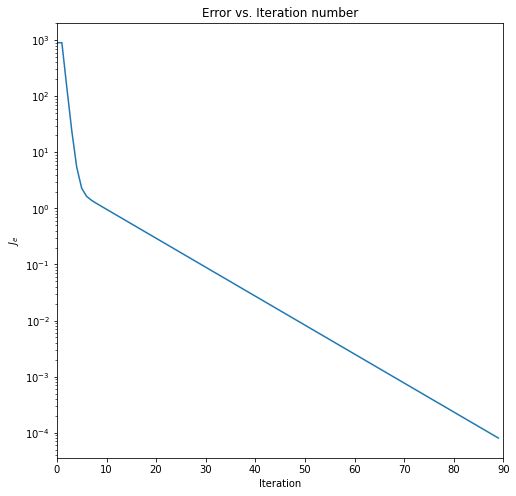

In [114]:
# Plotando o número de ITERAÇÕES vs ERRO: 

fig = plt.figure(figsize=(8,8))
plt.plot(np.arange(0, iteration), jgd[0:iteration])
plt.xlim((0, iteration))
plt.yscale('log')
plt.xlabel('Iteration')
plt.ylabel('$J_e$')
plt.title('Error vs. Iteration number')
plt.show()